In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [73]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


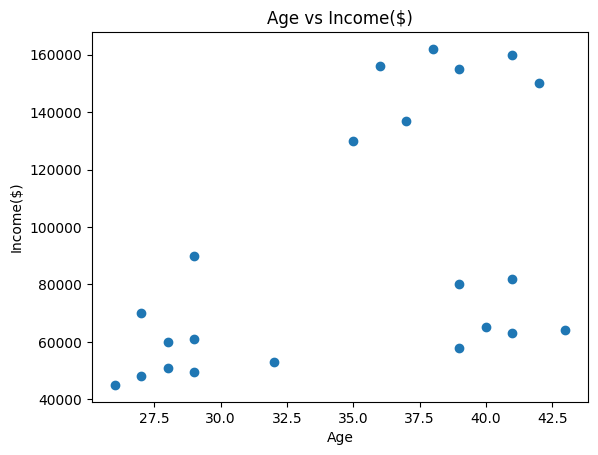

In [74]:
plt.scatter(df['Age'], df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Age vs Income($)')
plt.show()

In [75]:
df['Age'] = (df['Age']-df['Age'].min()) / (df['Age'].max()-df['Age'].min())
df['Income($)'] = (df['Income($)']-df['Income($)'].min()) / (df['Income($)'].max()-df['Income($)'].min())
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


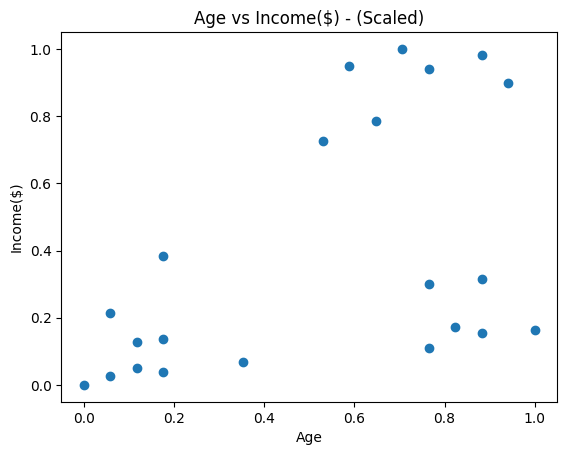

In [76]:
plt.scatter(df['Age'], df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Age vs Income($) - (Scaled)')
plt.show()

### Elbow Method

In [77]:
sse = [] # SSS -> Sum Square Error

for k in range(1, 12):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)
sse

[5.434011511988178,
 2.345614491472593,
 0.4750783498553094,
 0.3698658919234832,
 0.282940458716048,
 0.23014252862240325,
 0.2054876962752632,
 0.14718536793995937,
 0.1324634555751286,
 0.12375328215020048,
 0.08397026826698847]

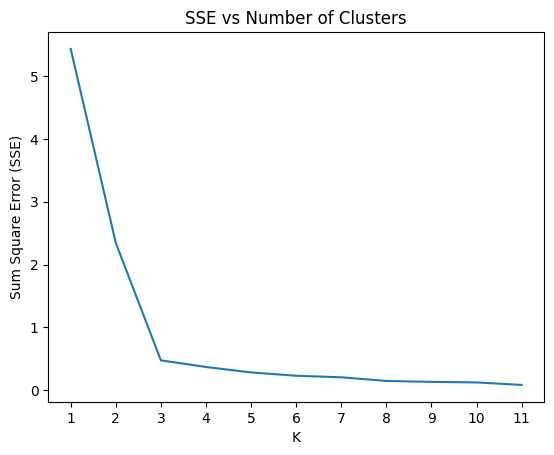

In [78]:
plt.plot(range(1,12), sse)
plt.xticks(range(1,12))
plt.xlabel('K')
plt.ylabel('Sum Square Error (SSE)')
plt.title("SSE vs Number of Clusters")
plt.show()

In [79]:
km = KMeans(n_clusters=3, random_state=42)
km

KMeans(n_clusters=3, random_state=42)

In [80]:
predicted_cluster = km.fit_predict(df[['Age', 'Income($)']])

In [81]:
df['cluster'] = predicted_cluster
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [82]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]

In [83]:
centriods_axis = km.cluster_centers_
centriods_axis[:,0]
centriods_axis[:,1]

array([0.8974359 , 0.11633428, 0.2022792 ])

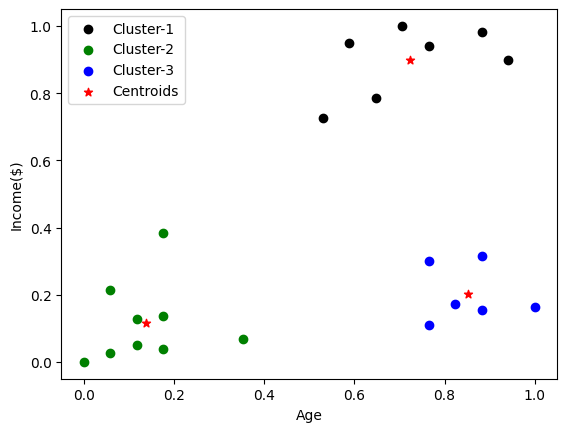

In [84]:
plt.scatter(df0['Age'], df0['Income($)'], color='black', label='Cluster-1')
plt.scatter(df1['Age'], df1['Income($)'], color='green', label='Cluster-2')
plt.scatter(df2['Age'], df2['Income($)'], color='blue', label='Cluster-3')
plt.scatter(centriods_axis[:,0], centriods_axis[:,1], marker='*', color='red', label='Centroids')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()
plt.show()